<a href="https://colab.research.google.com/github/srijan-das/mlaicrc/blob/master/PycharmProjects/Udemy/keras_project_nice_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/lending_club_loan_two.csv')
'''
print(df.head())
print(df.info())
print(df.columns)
'''

#target label --> loan_status
'''
print(df['loan_status'])
'''
df = pd.get_dummies(data=df, columns=['loan_status'], drop_first=True)
#print(df.info())
'''
sns.heatmap(df.corr(), annot=True)
plt.show()
'''

df = df.drop('installment', axis=1)

#print(df.info())

df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

#print(df['pub_rec_bankruptcies'].value_counts())
#print(df.info())

#print(df['mort_acc'].value_counts())

df['mort_acc'] = df['mort_acc'].fillna(0)

#print(df.info())

#print(df['application_type'].value_counts())

df = pd.get_dummies(df, columns=['application_type'], drop_first=True)

#print(df.info())

#print(df['initial_list_status'].value_counts())

df = pd.get_dummies(df, columns=['initial_list_status'], drop_first=True)

#print(df.info())

#print(df['earliest_cr_line'].value_counts())

#print(type(df['earliest_cr_line'][1]))
#print(df['earliest_cr_line'][1].split('-')[-1])

def year_getter(stuff) :
    stuff = stuff.split('-')
    return int(stuff[-1])

#print(year_getter(df['earliest_cr_line'][1]))

#print(df['earliest_cr_line'].apply(year_getter))

df['earliest_cr_line'] = df['earliest_cr_line'].apply(year_getter)

#print(df['earliest_cr_line'])

#print(df.info())

#print(df['title'].value_counts())

df = df.drop('title', axis=1)

#print(df.info())

#print(df['purpose'].value_counts()) Might wannna work more on this

df = df.drop('purpose', axis=1)

#print(df['issue_d'].value_counts())

df['issue_d'] = df['issue_d'].apply(year_getter)

#print(df['verification_status'].value_counts())

df = pd.get_dummies(df, columns=['verification_status'], drop_first=True)

#print(df['home_ownership'].value_counts())

df = pd.get_dummies(df, columns=['home_ownership'], drop_first=True)

#print(df['emp_length'].value_counts())

df = pd.get_dummies(df, columns=['emp_length'], drop_first=True)

#print(df['emp_title'].value_counts())

df = df.drop(labels=['emp_title'], axis=1)

#print(df['revol_util'].value_counts())

df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

#print(df['term'].value_counts())

df = pd.get_dummies(df, columns=['term'], drop_first=True)

#print(df['sub_grade'].value_counts())

df = df.drop(labels=['sub_grade'], axis=1)
df = pd.get_dummies(df, columns=['grade'], drop_first=True)

#print(df['address'][1])

df = df.drop(labels=['address'], axis=1)

#print(df.info())

'''
Data Cleaning over
target label --> loan_status_Fully Paid
'''

#print(df.head())
'''
sns.heatmap(df.corr(), annot=False)
plt.show()
'''
def feature_selector(data) :
    col_names = list(df.columns)
    names = list()
    corrs = df.corr()['loan_status_Fully Paid']
    for i in range(0, len(col_names)) :
        if abs(corrs[i]) < 0.0026 :
            names.append(col_names[i])
    return df.drop(labels=names, axis=1)

df = feature_selector(df)

#print(df.info())

X = df.drop('loan_status_Fully Paid', axis=1).values
y = df['loan_status_Fully Paid'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [8]:
X_train.shape

(297022, 31)

In [0]:
model = Sequential()

model.add(Dense(31, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=7, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=4, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=2, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1, mode='min', restore_best_weights=True)

In [12]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=500, verbose=1, callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 297022 samples, validate on 99008 samples
Epoch 1/500
297022/297022 [==============================] - 4s 14us/sample - loss: 0.5831 - val_loss: 0.5182
Epoch 2/500
297022/297022 [==============================] - 4s 13us/sample - loss: 0.5024 - val_loss: 0.4906
Epoch 3/500
297022/297022 [==============================] - 4s 13us/sample - loss: 0.4863 - val_loss: 0.4827
Epoch 4/500
297022/297022 [==============================] - 4s 13us/sample - loss: 0.4808 - val_loss: 0.4787
Epoch 5/500
297022/297022 [==============================] - 4s 13us/sample - loss: 0.4795 - val_loss: 0.4783
Epoch 6/500
297022/297022 [==============================] - 4s 13us/sample - loss: 0.4779 - val_loss: 0.4745
Epoch 7/500
297022/297022 [==============================] - 4s 13us/sample - loss: 0.4774 - val_loss: 0.4741
Epoch 8/500
297022/297022 [==============================] - 4s 13us/sample - loss: 0.4767 - val_loss: 0.4752
Epoch 9/500
297022/297022 [==============================] - 4s 13us/

<Figure size 1080x360 with 0 Axes>

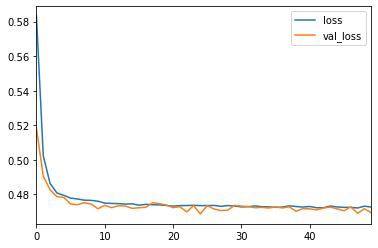

In [13]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
losses.plot()

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     19322
           1       0.80      1.00      0.89     79686

    accuracy                           0.80     99008
   macro avg       0.40      0.50      0.45     99008
weighted avg       0.65      0.80      0.72     99008

[[    0 19322]
 [    0 79686]]
